In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [3]:
eps = np.finfo(np.float32).resolution

In [4]:
n = 200
x = (np.random.rand(n)-0.5)*4
y  = x**2+np.random.rand(n)
c = np.where(y-y.mean()>0,1, 0 )
# y = -1*x + np.random.rand(n)
# y = np.log(x- x.min()+eps)+ np.random.rand(n)

# t = np.arange(n)/n*2*np.pi
# x = np.sin(t)
# y = np.cos(t)+ np.random.rand(n)*0.1
# y = t**2
# c = np.sin(5*t)>0

In [5]:
c.shape

(200,)

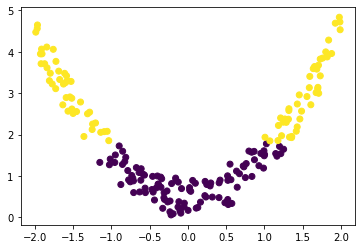

In [6]:
plt.scatter(x,y, c = c)

In [7]:
xprime, yprime = [(v-v.mean())/np.var(v) for v in [x,y]]

In [8]:
data = np.stack([xprime,yprime])
data.shape

(2, 200)

# the covarriance matrix
* is equal to the data matrix multiplied by its transpose
* some scaling is needed

In [9]:
r = np.matmul(data,data.T)
r/=r.max()
r

array([[ 1.        , -0.0080725 ],
       [-0.0080725 ,  0.83796126]])

In [10]:
cov = np.cov(data)
cov

array([[ 0.76115584, -0.00614443],
       [-0.00614443,  0.63781911]])

In [11]:
cov = np.cov(data)
cov/=cov.max()
cov

array([[ 1.        , -0.0080725 ],
       [-0.0080725 ,  0.83796126]])

In [12]:
cov.shape

(2, 2)

In [13]:
cov

array([[ 1.        , -0.0080725 ],
       [-0.0080725 ,  0.83796126]])

In [14]:
evalues, evector = LA.eig(cov)

$$Av = \lambda v$$
$$A(v -I\lambda) = 0 $$
* the determinate of the coefficients must be 0 to have a nontrival solution of 0
* eigenvalues are roots of the characteristic equation

In [15]:
evalues, evector

(array([1.00040117, 0.83756009]),
 array([[ 0.99876747,  0.04963403],
        [-0.04963403,  0.99876747]]))

In [16]:
idxs = np.flip(np.argsort(evalues)).astype(np.int)
evalues2 = evalues[idxs]
evectors2 = evector[:,idxs]

In [17]:
idxs

array([0, 1])

In [18]:
evalue_sum = np.sum(evalues2)
evalues3 = [e/evalue_sum for e in evalues2]
evalues3

[0.544299375031188, 0.45570062496881203]

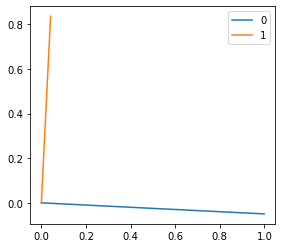

In [19]:
for i,(evector, evalue) in enumerate(zip(evectors2.T, evalues2)):
    xs = np.array([0,evector[0]])*evalue
    ys = np.array([0,evector[1]])*evalue
    plt.plot(xs,ys,label = str(i))
plt.legend()
ax = plt.gca()
ax.set_aspect(1)

In [20]:
evectors2

array([[ 0.99876747,  0.04963403],
       [-0.04963403,  0.99876747]])

In [21]:
evectors2.shape, data.shape

((2, 2), (2, 200))

In [22]:
evectors2_cut =evectors2 # evectors2[:,0]
evectors2_cut.shape

(2, 2)

In [23]:
data2 = np.matmul(data.T, evectors2_cut)

In [24]:
data2.shape

(200, 2)

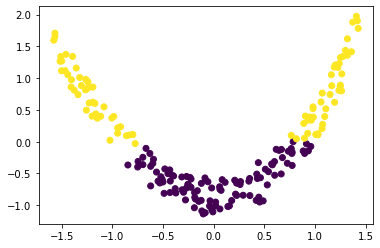

In [25]:
plt.scatter(data2[:,0], data2[:,1], c = c)
# plt.plot(data2)

In [26]:
from  sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)

In [28]:
data3 = pca.fit_transform(data.T)

In [29]:
print(pca.explained_variance_ratio_)

[0.54429938 0.45570062]


In [30]:
data3.shape

(200, 2)

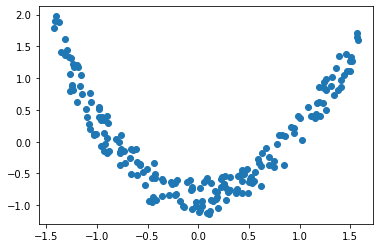

In [31]:
plt.scatter(data3[:,0], data3[:,1])

# why does it work?
* why does finding the eigen-vectors work?
* complicated, but
1. here we formulate the problem as a finding a vector which maximizes the varriance of the transform. 
    * https://en.wikipedia.org/wiki/Principal_component_analysis#First_component
    * key to this is that the $x$ values have been normalizes to have a mean of 0 and varriane of 1
     $$t_i = x_i * w_i$$  
    * This enables $t^2 /n $ to be the the new varriance after the transform. here t is a vector. 
    * the  of 1 was $x^2 /n $ was the old varriance 
    * so what what $w$ will maximize the varriance????
2. Finding the argmax
    * We can use Lagrange muliplers to show that the eign vector  is the vector at the stationary point of the Lagrangian. 
    * https://en.wikipedia.org/wiki/Rayleigh_quotient#Formulation_using_Lagrange_multipliers
    * this intepretation works for me. 
    * So, then the eigen vector with the largest eigen-value will maximize the varriance of the data when we use the eigenvector as a transform on the data (ie. we do matrix multiplication)

# some limitations
* Well it is linear. If your data is on some curved manifold, then might not be helpful. 
* could we seek to find some non-linear transforms which maximize the variance in the data?
    * seems like that could be bad. For example if the data was linear. a non-linear function could make add lots of varriance. 
        * like the data comes from $y = x$ (ie. a line)
    * whatever non-linear technique you think of should reduce to the PCA in the linear case. 
* the manifold learning algorithms often try to find a linear PCA in local region, then note the difference in the PCA orientations and intepret this as the curviture in the manifold. 

# show by guessing the eigen vectors is best?
* try some random vectos
* see which ones would maximize the variation in the transformed data

# Random projections

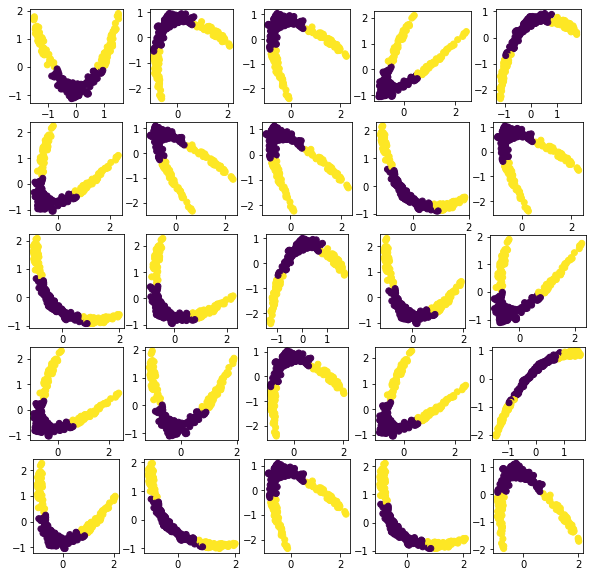

In [32]:
xprime, yprime = [(v-v.mean())/np.var(v) for v in [x,y]]
data = np.stack([xprime,yprime])
nn = 25
fig, ax  = plt.subplots(5,5, figsize=(10,10))
ax = ax.ravel()
data4 = data.T
# c = data4[:,0]
# ax[0].scatter(data4[:,0], data4[:,1], c = c)
cnt = 0
for i in range(5):
    for j in range(5):
        if cnt ==0:
            cnt+=1
            continue
        a = np.random.rand(2,2)
        orth_matrix = LA.eig(a)[1]

        orth_matrix.shape


        data5 = np.matmul(data.T, orth_matrix)
        ax[cnt].scatter(data5[:,0], data5[:,1],c = c)
        ax[cnt].set_aspect(1)
        cnt+=1

        # plot the original
cnt = 0
ax[cnt].scatter(data4[:,0], data4[:,1],c = c)
ax[cnt].set_aspect(1)

# not ortho transforms

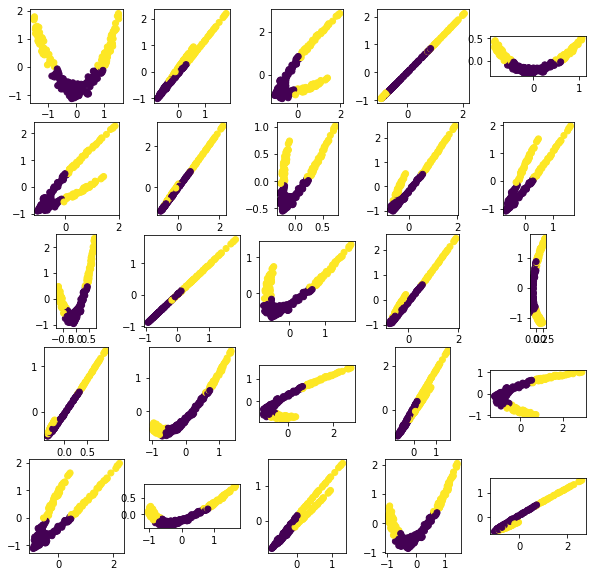

In [33]:
# data = np.stack([x,y])
xprime, yprime = [(v-v.mean())/np.var(v) for v in [x,y]]
data = np.stack([xprime,yprime])
nn = 25
fig, ax  = plt.subplots(5,5, figsize=(10,10))
ax = ax.ravel()
data4 = data.T
# c = data4[:,0]
# ax[0].scatter(data4[:,0], data4[:,1], c = c)
cnt = 0
for i in range(5):
    for j in range(5):
        if cnt ==0:
            cnt+=1
            continue
        a = np.random.rand(2,2)
#         orth_matrix = LA.eig(a)[1]

#         orth_matrix.shape


        data5 = np.matmul(data.T, a)
        ax[cnt].scatter(data5[:,0], data5[:,1],c = c)
        ax[cnt].set_aspect(1)
        cnt+=1

        # plot the original
cnt = 0
ax[cnt].scatter(data4[:,0], data4[:,1],c = c)
ax[cnt].set_aspect(1)

# m non-orthos with non-linear between

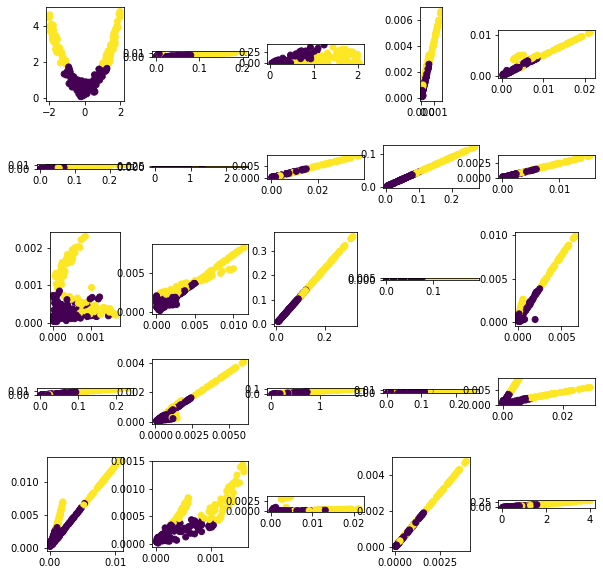

In [34]:
data = np.stack([x,y])
nn = 25
fig, ax  = plt.subplots(5,5, figsize=(10,10))
ax = ax.ravel()
data4 = data.T
dataT = data.T
# c = data4[:,0]
# ax[0].scatter(data4[:,0], data4[:,1], c = c)
cnt = 0
ones = np.ones_like(data4)
for i in range(5):
    for j in range(5):
        if cnt ==0:
            cnt+=1
            continue
        dataT = np.copy(data.T)
        for m in range(5):
            a = np.random.rand(2,2)
            orth_matrix = LA.eig(a)[1]
            dataT = np.matmul(dataT, orth_matrix)
            dataT = np.where(dataT>0,dataT, dataT*-0.1 )   
            
        
        
        ax[cnt].scatter(dataT[:,0], dataT[:,1],c = c)
        ax[cnt].set_aspect(1)
        cnt+=1

        # plot the original
cnt = 0
ax[cnt].scatter(data4[:,0], data4[:,1],c = c)
ax[cnt].set_aspect(1)

In [35]:
# data6